# Лабораторна робота №2

## Парна лінійна регресія

### Мета: отримати практичні навички регресійного аналізу для визначення невідомих закономірностей даних і побудови обґрунтованого прогнозу.

### Завдання: Побудувати модель залежності між фактором Х та показником У у вигляді парної лінійної регресії на основі статистичних даних за 100 періодів. Побудовану модель проаналізувати, перевірити на адекватність та стійкість, і спрогнозувати значення показника на наступний період. Завдання виконується за допомогою методу лінійної регресії в машинному навчанні.

In [3]:
import pandas as pd

# Завантажуємо датасет
df = pd.read_csv(r'/Users/dimazhuravlyov/Downloads/Air_Passenger_Traffic_per_Month_NY_NJ.csv')

# Виводимо назви полів
print(df.columns)

Index(['Airport', 'Code', 'Year', 'Month', 'DomesticPass', 'InternationalPass',
       'TotalPass'],
      dtype='object')


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Вибір полів для регресії
X = df[['DomesticPass']]
y = df['TotalPass']

In [6]:
# Розділення на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

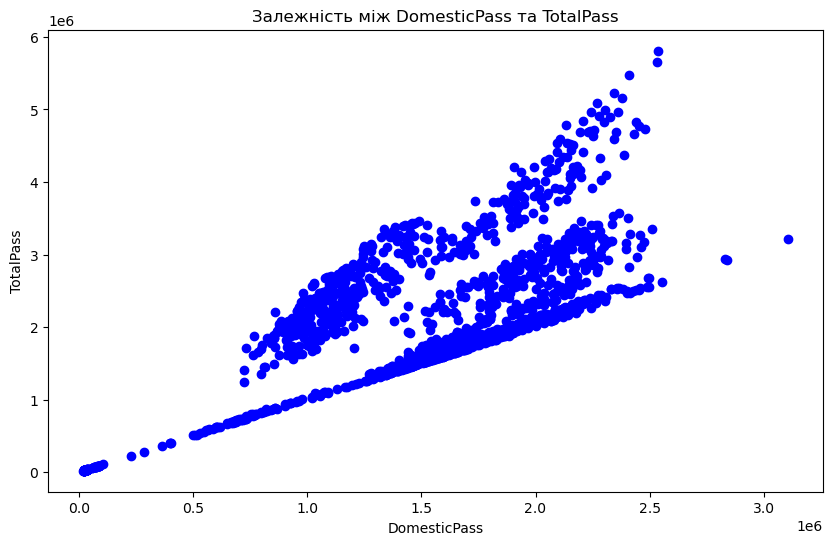

In [7]:
# Графічне зображення залежності
plt.figure(figsize=(10, 6))
plt.scatter(df['DomesticPass'], df['TotalPass'], color='blue')
plt.title('Залежність між DomesticPass та TotalPass')
plt.xlabel('DomesticPass')
plt.ylabel('TotalPass')
plt.show()

In [8]:
# Побудова лінійної регресії
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Виведення статистичних оцінок параметрів регресії
print("Коефіцієнт перетину:", regressor.intercept_)
print("Коефіцієнт нахилу:", regressor.coef_[0])

Коефіцієнт перетину: 303954.7724663713
Коефіцієнт нахилу: 1.1973550299071742


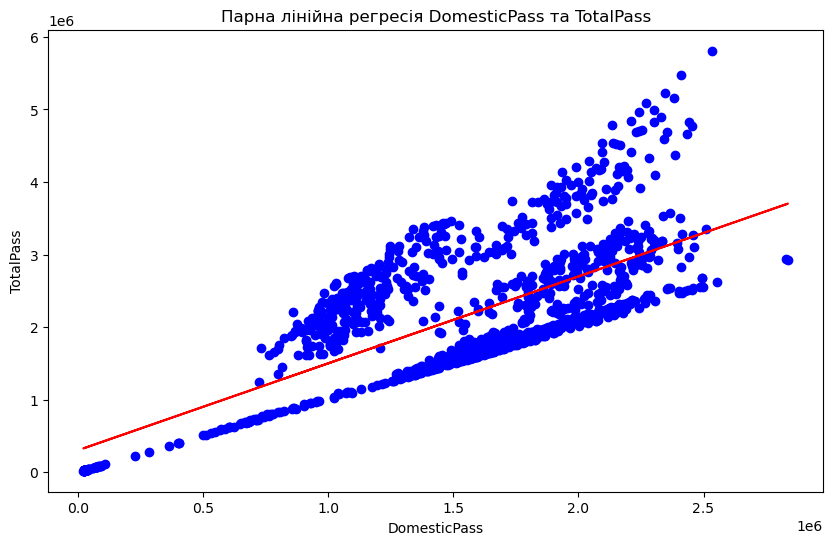

In [9]:
# Побудова графіку парної лінійної регресії
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Парна лінійна регресія DomesticPass та TotalPass')
plt.xlabel('DomesticPass')
plt.ylabel('TotalPass')
plt.show()

In [10]:
import scipy.stats as stats

In [11]:
# Визначення коефіцієнта детермінації та кореляції
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
correlation = np.sqrt(r2)

In [12]:
# Визначення статистичної значущості коефіцієнтів
n = len(y_test)
p = 1  # кількість незалежних змінних
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, n - p - 1)
slope_se = np.sqrt(np.sum((y_test - y_pred)**2) / (n - p - 1) / np.sum((X_test - X_test.mean())**2))
intercept_se = slope_se * np.sqrt(np.sum(X_test**2) / n)
slope_significance = np.abs(regressor.coef_[0]) / slope_se > t_value
intercept_significance = np.abs(regressor.intercept_) / intercept_se > t_value

In [ ]:
# Визначення прогнозу середнього значення залежної змінної
y_mean = np.mean(y_test)
y_mean_pred = regressor.predict(np.array([[X_test.mean().values[0]]]))[0]


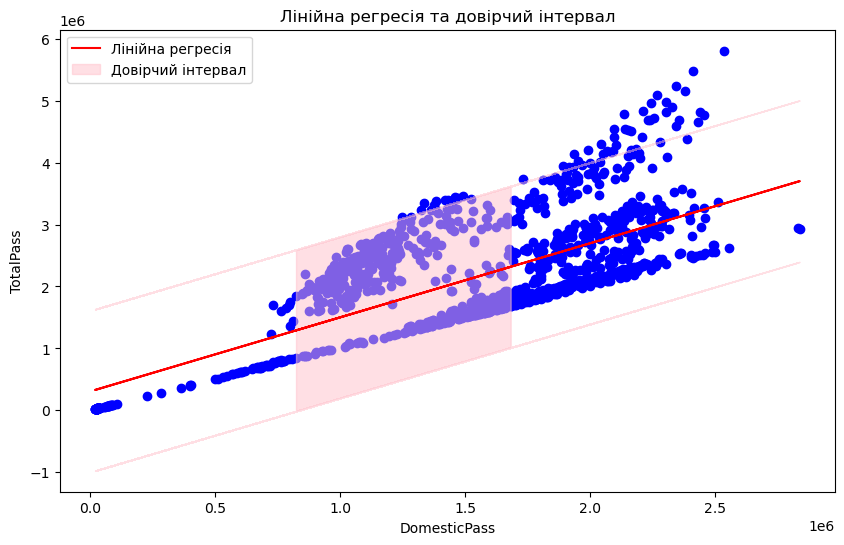

In [17]:
# Побудова графіку парної лінійної регресії та довірчого інтервалу
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red', label='Лінійна регресія')
confidence = 0.95
n = len(X_train)
y_pred = regressor.predict(X_train)
x_mean = X_train.mean().values[0]
x_std = np.sqrt(np.sum((X_train - x_mean)**2) / (n - 1))
t_crit = stats.t.ppf((1 + confidence) / 2, n - 2)
y_pred_std = np.sqrt(np.sum((y_train - y_pred)**2) / (n - 2))
y_lower, y_upper = y_pred - t_crit * y_pred_std, y_pred + t_crit * y_pred_std
plt.fill_between(X_train.values[:,0], y_lower, y_upper, color='pink', alpha=0.5, label='Довірчий інтервал')
plt.title('Лінійна регресія та довірчий інтервал')
plt.xlabel('DomesticPass')
plt.ylabel('TotalPass')
plt.legend()
plt.show()

In [19]:
# Виведення результатів
print("Коефіцієнт детермінації:", r2)
print("Кореляція:", correlation)
print("Статистична значущість коефіцієнтів:")
print("Коефіцієнт нахилу:", slope_significance)
print("Коефіцієнт перетину:", intercept_significance)
print("Прогноз середнього значення залежної змінної:", y_mean_pred)
print("Довірчий інтервал для теоретичної лінійної парної регресії:", (y_lower, y_upper))

Коефіцієнт детермінації: 0.5536258414752282
Кореляція: 0.7440603748858208
Статистична значущість коефіцієнтів:
Коефіцієнт нахилу: DomesticPass    True
dtype: bool
Коефіцієнт перетину: DomesticPass    True
dtype: bool
Прогноз середнього значення залежної змінної: 2089848.631973551
Довірчий інтервал для теоретичної лінійної парної регресії: (array([ -14211.76861723, 1309372.02060785, -963338.33785422, ...,
       1138748.92884608,  899207.27891788, 1013709.14307287]), array([2594773.30416228, 3918357.09338736, 1645646.73492528, ...,
       3747734.00162558, 3508192.35169738, 3622694.21585238]))


In [20]:
from sklearn.preprocessing import PolynomialFeatures

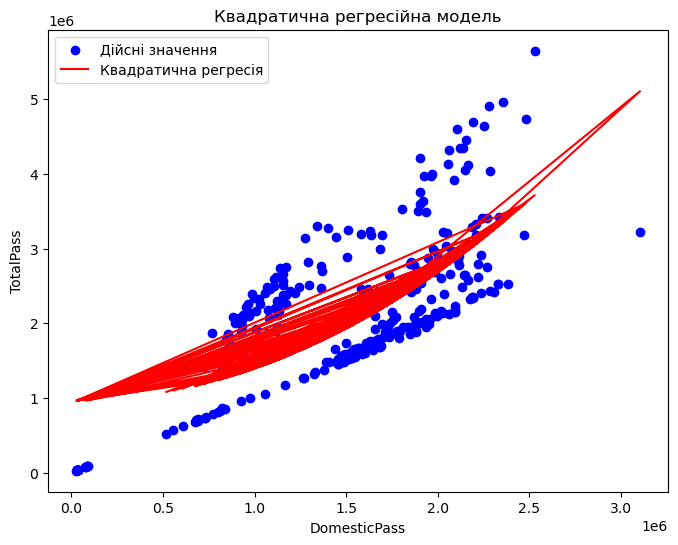

In [39]:
# Створення квадратичної моделі
model_quad = LinearRegression()
X_train_quad = X_train ** 2
model_quad.fit(X_train_quad, y_train)

# Оцінювання моделі на тестових даних
y_pred_quad = model_quad.predict(X_test ** 2)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Дійсні значення')
plt.plot(X_test, y_pred_quad, color='r', label='Квадратична регресія')
plt.xlabel('DomesticPass')
plt.ylabel('TotalPass')
plt.title('Квадратична регресійна модель')
plt.legend()
plt.show()

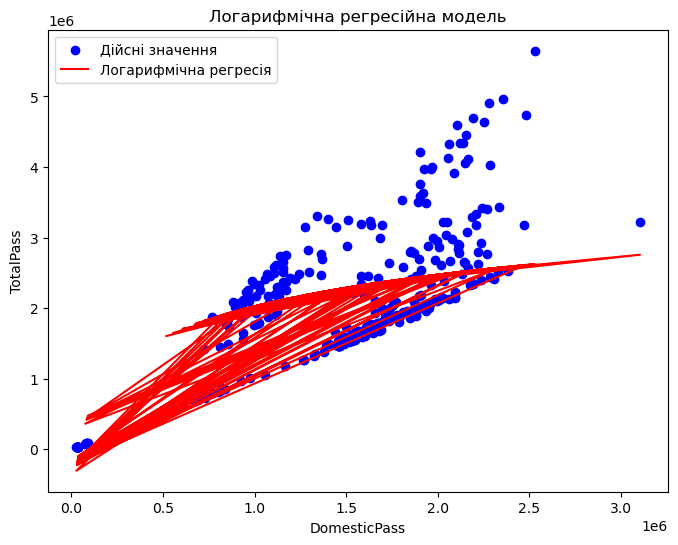

In [36]:
# Створення логарифмічної моделі
model_log = LinearRegression()
X_train_log = np.log(X_train)
model_log.fit(X_train_log, y_train)

# Оцінювання моделі на тестових даних
y_pred_log = model_log.predict(np.log(X_test))

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Дійсні значення')
plt.plot(X_test, y_pred_log, color='r', label='Логарифмічна регресія')
plt.xlabel('DomesticPass')
plt.ylabel('TotalPass')
plt.title('Логарифмічна регресійна модель')
plt.legend()
plt.show()

In [41]:
mse_quad = mean_squared_error(y_test, y_pred_quad)
r2_quad = r2_score(y_test, y_pred_quad)

print("Квадратична регресійна модель:")
print(f"Mean Squared Error: {mse_quad:.2f}")
print(f"R-squared: {r2_quad:.2f}")

Квадратична регресійна модель:
Mean Squared Error: 511106784770.99
R-squared: 0.49


In [42]:
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("\nЛогарифмічна регресійна модель:")
print(f"Mean Squared Error: {mse_log:.2f}")
print(f"R-squared: {r2_log:.2f}")


Логарифмічна регресійна модель:
Mean Squared Error: 543174476618.05
R-squared: 0.46


In [50]:
# Вибираємо перші сто періодів для навчання моделі
X_train_subset = X_train[:100]
y_train_subset = y_train[:100]

# Побудова та навчання лінійної регресійної моделі на підмножині даних
regressor_subset = LinearRegression()
regressor_subset.fit(X_train_subset, y_train_subset)

# Прогноз TotalPass на 101-й період
DomesticPass_101 = X_train.iloc[100]  
TotalPass_pred_101 = regressor_subset.predict(np.array([DomesticPass_101]))

# Виведення реального значення TotalPass на 101-му періоді
TotalPass_real_101 = y_train.iloc[100]

print("Прогноз TotalPass на 101-й період:", TotalPass_pred_101[0])
print("Реальне значення TotalPass на 101-му періоді:", TotalPass_real_101)

Прогноз TotalPass на 101-й період: 3141706.4699728857
Реальне значення TotalPass на 101-му періоді: 2365772


C:\Users\NATALIIA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
